In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('data/sentiment_analysis.csv')

In [5]:
data.head()


,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [6]:
data.shape


(7920, 3)

In [7]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7915    False
7916    False
7917    False
7918    False
7919    False
Length: 7920, dtype: bool

In [8]:
data.duplicated().sum()

0

In [9]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [10]:
#text preprocessing

In [11]:
import re
import string

In [12]:
data["tweet"].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

In [15]:
#convert upper to lower

data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [16]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [17]:
#remove links

data["tweet"] = data["tweet"].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))               

In [18]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [19]:
# remove punctuations
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
data["tweet"] = data["tweet"].apply(remove_punctuations)

In [22]:
data["tweet"].head(5)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

In [23]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [27]:
#remove numbers

data["tweet"] = data["tweet"].str.replace('\d+', '', regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\User\AppData\Local\Temp\ipykernel_24628\910477839.py:1: SyntaxWarning: invalid escape sequence '\d'
  data["tweet"] = data["tweet"].str.replace('\d+', '', regex=True)


In [28]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [32]:
#remove stopwords
!pip install nltk


  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.0 kB ? eta -:--:--
     --------------------------- ---------- 30.7/42.0 kB 262.6 kB/s eta 0:00:01
     -------------------------------------- 42.0/42.0 kB 291.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.5 MB 960.0 kB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.5 MB 919.0 kB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.5 MB 819.2 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.5 MB 1.1 MB/s eta 0:00:02
   ------ --------------------------------- 0.3/1.5 MB 1.2 MB/s eta 0:00:02
   --------- ------------------------------ 0.4/1.5 MB 1.3 MB/s eta 0:00:01
   ---------- -------------------------

In [34]:
import nltk
nltk.download('stopwords', download_dir='static/model')

[nltk_data] Downloading package stopwords to static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [35]:
with open('static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()


In [36]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [37]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split()if x not in sw ))

In [38]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    completely love new iphone emojis iphone apple...
7912    tune turn drop gtd one app mobile mind meditat...
7913    ok galaxy crashed one day wait til monday skyr...
7914    gain followers rt must follow follow back foll...
7915    live loud lol liveoutloud selfie smile sony mu...
7916    would like wish amazing day make every minute ...
7917    helping lovely year old neighbor ipad morning ...
7918    finally got smart pocket wifi stay connected a...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [40]:
#Stemming

from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [41]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [42]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911         complet love new iphon emoji iphon appl emoj
7912    tune turn drop gtd one app mobil mind medit op...
7913    ok galaxi crash one day wait til monday skyroc...
7914    gain follow rt must follow follow back follow ...
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, dtype: object

#Build Vacabulary

In [46]:
from collections import Counter
vocab = Counter()

In [49]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


In [51]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

len(vocab)

15951

In [56]:
tokens = [key for key in vocab if vocab[key] > 20]

In [57]:
len(tokens)

1145

In [60]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, 'static/model/vocabulary.txt')

### DIVIDE DATASET

In [64]:
x = data['tweet']
y = data['label']

In [61]:
!pip install scikit-learn

     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.6 kB 445.2 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.6 kB 281.8 kB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 359.6 kB/s eta 0:00:00
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.9 MB 3.2 MB/s eta 0:00:04
   ---------------------------------------- 0.1/10.9 MB 1.7 MB/s eta 0:00:07
   ---------------------------------------- 0.1/10.9 MB 1.0 MB/s eta 0:00:11
    --------------------------------------- 0.2/10.9 MB 1.2 MB/s eta 0:00:09
    --------------------------------------- 0.2/10.9 MB 1.3 MB/s eta 0:00:09
    --------------------------------------- 0.3/10.9 MB 1.0 MB/s eta 0:00:11
   - ---------

In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [69]:
x_train.shape

(6336,)

In [70]:
x_test.shape

(1584,)

In [71]:
x_train

4867    even tri email soni listen respons still dont ...
4294    let call art amaz beauti copenhagen creativ co...
1264    coffe love iphoneographi instagram iphonesia p...
7258    ad kid hoodi collect product check … iphon cas...
4772    sure love phone wont charg make call lock scre...
                              ...                        
4882    love rainsmel final spring rain smell spe inst...
4391    well att appl truli fuck servic elig neither k...
85      appl call made someth wrong right today make t...
4209    beauti shop aliusaexpress iphon io app new edi...
6306    pc exquisit squishi random charm iphon strap t...
Name: tweet, Length: 6336, dtype: object

In [72]:
x_test

850     appl save itun account guy appl custom support...
7496    yeah bb suck iphon rt mnstre love sinc ive bb ...
588     happi announc entir storeus coupon code crosss...
4419    got new phone make sure send text messag imess...
3097         sick phone cant call anyon stupid iphon piss
                              ...                        
1736    iphon audio may suck near futur beat readi app...
6357    new babi welcom home new phone samsung galaxi ...
5402    let get beauti beautytip beauti app iphon fash...
4782    photo alway awe p “tara” culverc laloc soni in...
6231    thank appl make document cant open nonappl com...
Name: tweet, Length: 1584, dtype: object

In [73]:
y_train

4867    1
4294    0
1264    0
7258    0
4772    1
       ..
4882    0
4391    1
85      0
4209    0
6306    0
Name: label, Length: 6336, dtype: int64

In [74]:
y_test

850     0
7496    1
588     0
4419    0
3097    1
       ..
1736    1
6357    0
5402    0
4782    0
6231    1
Name: label, Length: 1584, dtype: int64

In [75]:
def vectorizer(ds, vocabulary):
    vectorized_list = []

    for sentence in ds:
        sentence_list = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_list[i] = 1

        vectorized_list.append(sentence_list)
    vectorized_list_new = np.asarray(vectorized_list, dtype=np.float32)

    return vectorized_list_new




In [76]:
vectorized_x_train = vectorizer(x_train, tokens)

In [78]:
vectorized_x_train[0]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [79]:
vectorized_x_test = vectorizer(x_test, tokens)

In [80]:
vectorized_x_test[0]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [82]:
y_train.value_counts()

label
0    4703
1    1633
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x22133660920>,
 [Text(-0.758692089678396, 0.7964837180127594, 'positive'),
  Text(0.7586920896783959, -0.7964837180127595, 'negative')])

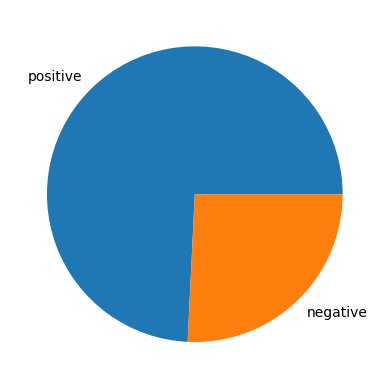

In [84]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]),labels=["positive", "negative"])
        

In [5]:
!pip install imbalanced-learn

## HANDLE INBALANCED DATASET

In [3]:
pip show imbalanced-learn


Name: imbalanced-learn
Version: 0.12.2
Summary: Toolbox for imbalanced dataset in machine learning.
Home-page: https://github.com/scikit-learn-contrib/imbalanced-learn
Author: 
Author-email: 
License: MIT
Location: C:\Users\User\Desktop\Sentiment_Analysis_Project\env\Lib\site-packages
Requires: joblib, numpy, scikit-learn, scipy, threadpoolctl
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip show scikit-learn

Name: scikit-learn
Version: 1.5.0
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\User\Desktop\Sentiment_Analysis_Project\env\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: imbalanced-learn
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install imbalanced-learn==0.8.0


   ---------------------------------------- 0.0/206.5 kB ? eta -:--:--
   - -------------------------------------- 10.2/206.5 kB ? eta -:--:--
   ----- --------------------------------- 30.7/206.5 kB 330.3 kB/s eta 0:00:01
   ------- ------------------------------- 41.0/206.5 kB 281.8 kB/s eta 0:00:01
   ------------- ------------------------- 71.7/206.5 kB 393.8 kB/s eta 0:00:01
   -------------------- ----------------- 112.6/206.5 kB 547.6 kB/s eta 0:00:01
   -------------------------------- ----- 174.1/206.5 kB 615.9 kB/s eta 0:00:01
   -------------------------------------- 206.5/206.5 kB 660.6 kB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.12.2
    Uninstalling imbalanced-learn-0.12.2:
      Successfully uninstalled imbalanced-learn-0.12.2
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip show scikit-learn

Name: scikit-learn
Version: 1.5.0
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\User\Desktop\Sentiment_Analysis_Project\env\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: imbalanced-learn
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip show imbalanced-learn

Name: imbalanced-learn
Version: 0.8.0
Summary: Toolbox for imbalanced dataset in machine learning.
Home-page: https://github.com/scikit-learn-contrib/imbalanced-learn
Author: 
Author-email: 
License: MIT
Location: C:\Users\User\Desktop\Sentiment_Analysis_Project\env\Lib\site-packages
Requires: joblib, numpy, scikit-learn, scipy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-learn==0.24.2


  Using cached scikit-learn-0.24.2.tar.gz (7.5 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [20 lines of output]
  <string>:17: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  Partial import of sklearn during the build process.
  Traceback (most recent call last):
    File "C:\Users\User\Desktop\Sentiment_Analysis_Project\env\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    File "C:\Users\User\Desktop\Sentiment_Analysis_Project\env\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\User\Desktop\Sentiment_Analysis_Project\env\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 149, in prepare_metadata_for_build_wh

In [1]:
pip show scikit-learn

Name: scikit-learn
Version: 1.5.0
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\User\Desktop\Sentiment_Analysis_Project\env\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: imbalanced-learn
Note: you may need to restart the kernel to use updated packages.


In [2]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

ImportError: cannot import name '_print_elapsed_time' from 'sklearn.utils' (C:\Users\User\Desktop\Sentiment_Analysis_Project\env\Lib\site-packages\sklearn\utils\__init__.py)